# Classification with Naive Bayes

### Importing Required Libraries

In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

### Loadig the Iris Dataset

In [48]:
df = sns.load_dataset('iris')
df.rename(columns={'species':'target'},inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
# Splitting it into 2
X = df.drop(['target'], axis='columns')
y = df.target

In [50]:
# Equally Splitting Dataset 40 samples for training & 10 for testing of each category using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

In [51]:
# 40 samples of training
y_train.value_counts()

virginica     40
versicolor    40
setosa        40
Name: target, dtype: int64

In [52]:
# 10 samples of testing
y_test.value_counts()

setosa        10
versicolor    10
virginica     10
Name: target, dtype: int64

In [53]:
# Concatenating training dataset into one df
df_train = pd.concat([X_train, y_train], axis=1)

In [54]:
df_train.target.value_counts()

virginica     40
versicolor    40
setosa        40
Name: target, dtype: int64

In [55]:
# Concatenating testing dataset into one df
df_test = pd.concat([X_test, y_test], axis=1)

In [56]:
df_test.target.value_counts()

setosa        10
versicolor    10
virginica     10
Name: target, dtype: int64

### Calculation of Prior Probability

In [57]:
def prior_probability(df):
    prior_probabilities = df.groupby(by='target').apply(lambda x:len(x)/len(df)) # prior probability based on category
    return (prior_probabilities).values

In [58]:
# prior probability values
prior_probabilities = df.groupby(by='target').apply(lambda x:len(x)/len(df))
prior_probabilities

target
setosa        0.333333
versicolor    0.333333
virginica     0.333333
dtype: float64

### Mean & Variance

In [59]:
def mean_variance(df):
    mean = df.groupby(by='target').apply(lambda x: x.mean(axis=0))
    variance = df.groupby(by='target').apply(lambda x: x.var(axis=0))
    return (mean.values, variance.values)

In [60]:
# Mean, Standard Deviation & Variance values based on category
mean = df.groupby(by='target').apply(lambda x: x.mean(axis=0))
variance = df.groupby(by='target').apply(lambda x: x.var(axis=0))

print("Mean Values by Category\n")
print(mean)

print("\nVariance by Category\n")
print(variance)                         # variance = (std.dev)**2

std_dev = np.sqrt(variance)
print("\nStandard Deviation by Category\n")
print(std_dev)

Mean Values by Category

            sepal_length  sepal_width  petal_length  petal_width
target                                                          
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

Variance by Category

            sepal_length  sepal_width  petal_length  petal_width
target                                                          
setosa          0.124249     0.143690      0.030159     0.011106
versicolor      0.266433     0.098469      0.220816     0.039106
virginica       0.404343     0.104004      0.304588     0.075433

Standard Deviation by Category

            sepal_length  sepal_width  petal_length  petal_width
target                                                          
setosa          0.352490     0.379064      0.173664     0.105386
versicolor      0.516171     0.313798      0.469911     0.197753
virginica

### Gaussian Probability Density

In [61]:
def probability_density(mean, variance, x):
    probability_density = (1/np.sqrt(2*np.pi*variance)) * np.exp((-(x - mean)**2)/(2*variance))  # using Gaussian Probability Density Formula
    return probability_density

In [62]:
GPD = probability_density(1, 2, 1)
GPD

0.28209479177387814

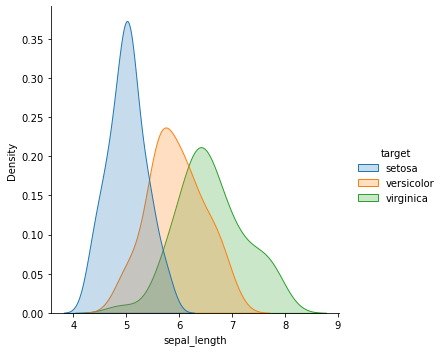

In [63]:
sns.displot(df, x="sepal_length", hue="target", kind="kde", fill=True)

### Fitting Data to get Posterior Probability Parameters

In [64]:
def parameters(df):
    
    n_cols = len(df.columns)-1              # excluding the target column
    unique_labels = df['target'].unique()   
    n_unique_labels = len(unique_labels)
    
    mean, variance = mean_variance(df)
    prior_probabilities = prior_probability(df) 
    
    return {
        'n_cols': n_cols,
        'unique_labels': unique_labels,
        'n_unique_labels': n_unique_labels,
        'mean': mean,
        'variance': variance,
        'prior_probabilities': prior_probabilities
    }

In [65]:
post_para = parameters(df)

In [66]:
post_para

{'n_cols': 4,
 'unique_labels': array(['setosa', 'versicolor', 'virginica'], dtype=object),
 'n_unique_labels': 3,
 'mean': array([[5.006, 3.428, 1.462, 0.246],
        [5.936, 2.77 , 4.26 , 1.326],
        [6.588, 2.974, 5.552, 2.026]]),
 'variance': array([[0.12424898, 0.1436898 , 0.03015918, 0.01110612],
        [0.26643265, 0.09846939, 0.22081633, 0.03910612],
        [0.40434286, 0.10400408, 0.30458776, 0.07543265]]),
 'prior_probabilities': array([0.33333333, 0.33333333, 0.33333333])}

### Posterior Probabilities

In [67]:
def posterior_probabilities(df_row, mean, variance, n_unique_labels, n_cols):
    
    posterior_probabilities = []
    
    for i in range(n_unique_labels):     #Calculate probabilities of each category
        posterior = 0
        
        # For each Feautre
        for j in range (n_cols):
            posterior += (probability_density(mean[i][j], variance[i][j], df_row[j]))
        posterior_probabilities.append(posterior)
        
    return posterior_probabilities

In [68]:
posterior = posterior_probabilities(df_test.iloc[1,:], post_para['mean'], post_para['variance'], post_para['n_unique_labels'], post_para['n_cols'])
posterior

[0.5564131273241626, 4.002835780210788, 2.0502916288113004]

In [69]:
df_test.head()

,sepal_length,sepal_width,petal_length,petal_width,target
35,5.0,3.2,1.2,0.2,setosa
75,6.6,3.0,4.4,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
30,4.8,3.1,1.6,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


### Prediction

In [70]:
def predict(test_df, post_para):
    
    predictions = []
    for i in range (len(test_df)):
        
        prior = post_para['prior_probabilities']
        posterior = posterior_probabilities(df_test.iloc[i, :-1], post_para['mean'], post_para['variance'], post_para['n_unique_labels'], post_para['n_cols'])
        
        probabilities = prior + posterior
        
        # np.argmax to get one with Max probability
        
        mx_idx = np.argmax(probabilities)
        predictions.append(post_para['unique_labels'][mx_idx])  # add log values
        
    return predictions

In [71]:
predictions = predict(df_test, post_para)

In [72]:
predictions

['setosa',
 'versicolor',
 'versicolor',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'setosa',
 'versicolor',
 'setosa',
 'virginica',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'virginica',
 'virginica',
 'setosa',
 'virginica',
 'versicolor',
 'setosa']

### Evaluation

In [73]:
accuracy = len(df_test.loc[predictions == df_test['target']])/len(df_test)

In [74]:
accuracy

0.9333333333333333